In [1]:
 ### Prepare module structure ###

import sys
sys.path.append("../")

In [2]:
### IMPORT ###

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from util import *

# auto reload imports on local changes
%load_ext autoreload
%autoreload 2
print(torch.__version__)

1.0.0


In [3]:
import pickle

out_original = pickle.load(open("/home/shared/phase-retrieval/test/cGAN_CelebA/cgan_original_7_1024.p", "rb"))

# load prcgan*
out_prcgan_star = pickle.load(open("/home/shared/phase-retrieval/test/cGAN_CelebA/cgan_7_1024.p", "rb"))

In [4]:
# load prcgan
out_prcgan = pickle.load(open( "/home/shared/phase-retrieval/test/cGAN_CelebA/cgan_rnd_7_1024.p", "rb" ))

In [5]:
# load e2e
out_e2e = pickle.load(open( "/home/shared/phase-retrieval/test/CNNnet_CelebA/predicted_1.p", "rb" ))

In [6]:
# load dpr
out_dpr = pickle.load(open("/home/shared/phase-retrieval/test/DCGAN_CelebA/Ameas_3_1024.p", "rb"))

In [7]:
from scipy.signal import convolve2d
def calculate_gradients(x):
    f = np.array([[1,-1]])
    filtered = np.vstack([convolve2d(x, f, mode='valid')[:-1,:], convolve2d(x, f.T, mode='valid')[:,:-1]])
    return filtered.flatten()

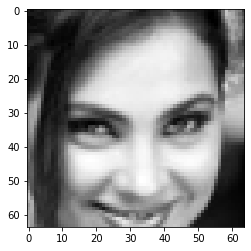

In [8]:
from scipy.ndimage.filters import gaussian_filter
i=26


original_gray = np.transpose(out_original[i],(1,2,0))
original_gray = rgb2gray(original_gray)
plot(original_gray)
grad_orig = calculate_gradients(original_gray).flatten()

out_e2e_gray = np.transpose(out_e2e[i],(1,2,0))
out_e2e_gray = rgb2gray(out_e2e_gray)
grad_e2e = calculate_gradients(out_e2e_gray).flatten()


out_dpr_gray = np.transpose(out_dpr[i],(1,2,0))
out_dpr_gray = rgb2gray(out_dpr_gray)
grad_dpr = calculate_gradients(out_dpr_gray).flatten()

out_prcgan_gray = np.transpose(out_prcgan[i],(1,2,0))
out_prcgan_gray = rgb2gray(out_prcgan_gray)
grad_prcgan = calculate_gradients(out_prcgan_gray).flatten()


out_prcgan_star_gray = np.transpose(out_prcgan_star[i],(1,2,0))
out_prcgan_star_gray = rgb2gray(out_prcgan_star_gray)
grad_prcgan_star = calculate_gradients(out_prcgan_star_gray).flatten()

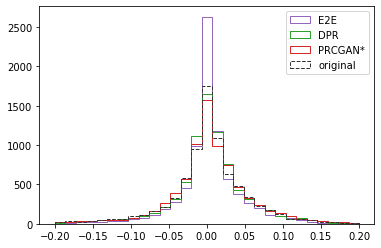

In [9]:
bins = np.linspace(-0.2, 0.2, 30)

plt.hist(grad_e2e, bins=bins, histtype='step', label='E2E', color='C4');
plt.hist(grad_dpr, bins=bins, histtype='step', label='DPR', color='C2');
#plt.hist(grad_prcgan, bins=bins, histtype='step', label='PRCGAN', color='C1');
plt.hist(grad_prcgan_star, bins=bins, histtype='step', label='PRCGAN*', color='C3');
plt.hist(grad_orig, bins=bins, histtype='step', label='original', color=(0.2, 0.2, 0.2), linestyle="--");

plt.legend();
plt.savefig('../out/plots/CelebA_gradient_histogram_small.png', dpi=200)

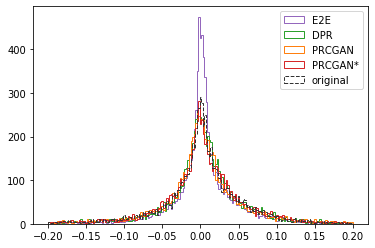

In [10]:
bins = np.linspace(-0.2, 0.2, 200)

plt.hist(grad_e2e, bins=bins, histtype='step', label='E2E', color='C4');
plt.hist(grad_dpr, bins=bins, histtype='step', label='DPR', color='C2');
plt.hist(grad_prcgan, bins=bins, histtype='step', label='PRCGAN', color='C1');
plt.hist(grad_prcgan_star, bins=bins, histtype='step', label='PRCGAN*', color='C3');
plt.hist(grad_orig + 0.002 * np.random.randn(*grad_orig.shape), bins=bins, histtype='step',
         label='original', color=(0.2, 0.2, 0.2), linestyle="--");

plt.legend();
plt.savefig('../out/plots/CelebA_gradient_histogram.png', dpi=200)

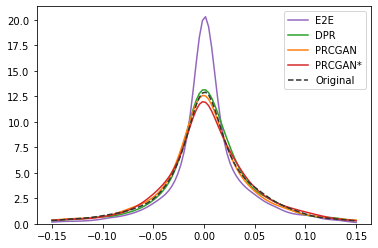

In [11]:
import seaborn as sns

sns.kdeplot(grad_e2e, clip=(-0.15, 0.15), label="E2E", color='C4')#.set_yscale('log')
sns.kdeplot(grad_dpr, clip=(-0.15, 0.15), label="DPR", color='C2')
sns.kdeplot(grad_prcgan, clip=(-0.15, 0.15), label="PRCGAN", color='C1')
sns.kdeplot(grad_prcgan_star, clip=(-0.15, 0.15), label="PRCGAN*", color='C3')
sns_plot = sns.kdeplot(grad_orig, clip=(-0.15, 0.15), label="Original", color=(0.2, 0.2, 0.2), linestyle="--")
sns_plot.get_figure().savefig("../out/plots/CelebA_gradient_density.png", dpi=200)
pass

In [12]:
count = 1024

original_gray = np.transpose(out_original,(0,2,3,1))
original_gray = rgb2gray(original_gray)[:count]
grad_orig = np.stack([calculate_gradients(x) for x in original_gray]).flatten()

out_e2e_gray = np.transpose(out_e2e,(0,2,3,1))
out_e2e_gray = rgb2gray(out_e2e_gray)[:count]
grad_e2e = np.stack([calculate_gradients(x) for x in out_e2e_gray]).flatten()

out_dpr_gray = np.transpose(out_dpr,(0,2,3,1))
out_dpr_gray = rgb2gray(out_dpr_gray)[:count]
grad_dpr = np.stack([calculate_gradients(x) for x in out_dpr_gray]).flatten()

out_prcgan_gray = np.transpose(out_prcgan,(0,2,3,1))
out_prcgan_gray = rgb2gray(out_prcgan_gray)[:count]
grad_prcgan = np.stack([calculate_gradients(x) for x in out_prcgan_gray]).flatten()

out_prcgan_star_gray = np.transpose(out_prcgan_star,(0,2,3,1))
out_prcgan_star_gray = rgb2gray(out_prcgan_star_gray)[:count]
grad_prcgan_star = np.stack([calculate_gradients(x) for x in out_prcgan_star_gray]).flatten()

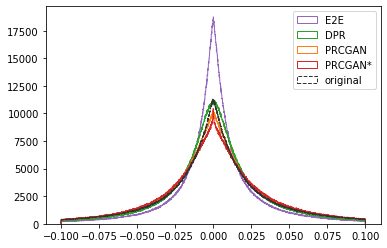

In [13]:
bins = np.linspace(-0.1,0.1, 3000)

plt.hist(grad_e2e, bins=bins, histtype='step', label='E2E', color='C4');
plt.hist(grad_dpr, bins=bins, histtype='step', label='DPR', color='C2');
plt.hist(grad_prcgan, bins=bins, histtype='step', label='PRCGAN', color='C1');
plt.hist(grad_prcgan_star, bins=bins, histtype='step', label='PRCGAN*', color='C3');
plt.hist(grad_orig + 0.002 * np.random.randn(*grad_orig.shape), bins=bins, histtype='step', label='original',
         color=(0.2, 0.2, 0.2), linestyle="--");
plt.legend();
plt.savefig('../out/plots/CelebA_gradient_histogram_full.png', dpi=200)

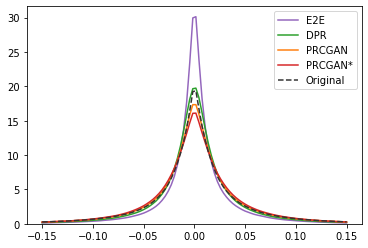

In [14]:
import seaborn as sns

c = 0.15
sns.kdeplot(grad_e2e, clip=(-c, c), label="E2E", color='C4')
sns.kdeplot(grad_dpr, clip=(-c, c), label="DPR", color='C2')
sns.kdeplot(grad_prcgan, clip=(-c, c), label="PRCGAN", color='C1')
sns.kdeplot(grad_prcgan_star, clip=(-c, c), label="PRCGAN*", color='C3')
sns_plot = sns.kdeplot(grad_orig, clip=(-c, c), label="Original", color=(0.2, 0.2, 0.2), linestyle="--")
sns_plot.get_figure().savefig("../out/plots/CelebA_gradient_density_full.png", dpi=200)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:331: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, max(ax.get_ylim()[1], (1 + ymargin) * y.max()))


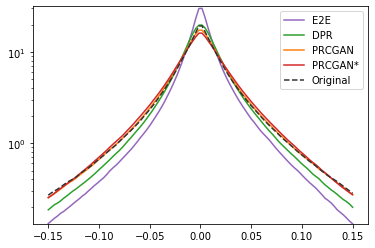

In [15]:
import seaborn as sns

c = 0.15
sns.kdeplot(grad_e2e, clip=(-c, c), label="E2E", color='C4').set_yscale('log')
sns.kdeplot(grad_dpr, clip=(-c, c), label="DPR", color='C2')
sns.kdeplot(grad_prcgan, clip=(-c, c), label="PRCGAN", color='C1')
sns.kdeplot(grad_prcgan_star, clip=(-c, c), label="PRCGAN*", color='C3')
sns_plot = sns.kdeplot(grad_orig, clip=(-c, c), label="Original", color=(0.2, 0.2, 0.2), linestyle="--")
sns_plot.get_figure().savefig("../out/plots/CelebA_gradient_logdensity_full.png", dpi=200)
pass